# Loading of Datasets

Based on the preprocessing conducted, we have selected the following datasets to conduct an evaluation to determine which dataset will be used before performing hyperparameter tuning on our desired dataset.

The datasets that we have chosen are:
- `noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl`: Non-Cir (Standard Scaled after feature selection) with CIR Statistical Measures (PCA and Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_ss_scaled.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_pca.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (PCA)

The datasets will be loaded into `dataset_1`, `dataset_2`, `dataset_3` respectively.

In [1]:
from utils import *
import pandas as pd
import numpy as np

dataset_1 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl")
dataset_2 = load_from_pickle("noncir_ss_scaled_trimmed_cir_ss_scaled.pkl")
dataset_3 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca.pkl")

# Support Vector Machine (SVM)

Summary

Given the results, Dataset 1 with the Radial Basis Function kernel is selected as the most optimal dataset and parameter for the SVM classifier. This decision is based on several factors where the Radial Basis Function kernel with Dataset 1 achieved the highest testing accuracy (86.5%) among all configurations, which is critical for reliable model performance on unseen data. While its training accuracy (88.6%) is marginally lower than that achieved on Dataset 2 with the Radial Basis Function kernel, the difference is not significant enough to offset the advantages in testing accuracy.

Furthermore, although the Radial Basis Function kernel requires more computational time compared to the linear kernel, the increase in training time (9.3 seconds) and testing time (6.8 seconds) is justified given the improvement in accuracy. Additionally, the precision, recall, and F1 score metrics for the Radial Basis Function kernel on Dataset 1 are consistently high, reflecting a balanced performance across different aspects of classification efficacy. The confusion matrix for this configuration reveals a proportionate number of true positives and true negatives, indicating the model’s capability to classify both classes effectively.

Considering all these metrics collectively, the RBF kernel on Dataset 1 emerges as the most robust and accurate model, striking a favourable balance between computational efficiency and predictive performance.


## Linear SVM

### Dataset_1 (noncir_ss_scaled_trimmed_cir_pca_ss_scaled)

Evaluation of the performance of `dataset_1`. With a 70:30 training and test split

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Select the features to be used for Support Vector Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM,  we will iterate through various values of the regularization parameter `C`.

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.

In [3]:
C = [0.0001, 0.001, 0.01, 0.1, 1]

training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'linear', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))


C Value:  0.0001
Training Accuracy:  0.845
Testing Accuracy:  0.8333333333333334
C Value:  0.001
Training Accuracy:  0.8593197278911565
Testing Accuracy:  0.8473015873015873
C Value:  0.01
Training Accuracy:  0.8618367346938776
Testing Accuracy:  0.85
C Value:  0.1
Training Accuracy:  0.8621428571428571
Testing Accuracy:  0.849920634920635
C Value:  1
Training Accuracy:  0.8624489795918368
Testing Accuracy:  0.8501587301587301


#### Training vs Testing Accuracy Graph

Based on the C (Regularization Parameter), the most optimal value of C is at 0.01 where the training and testing accuracy hovers around a similar accuracy range as the value of C increases.

By selecting an optimal value of C, we are able to prevent overfitting from a high value of C and underfitting from a low value of C.

The optimal parameter for linear SVM with Dataset 1 is:
- `C`: `0.01`

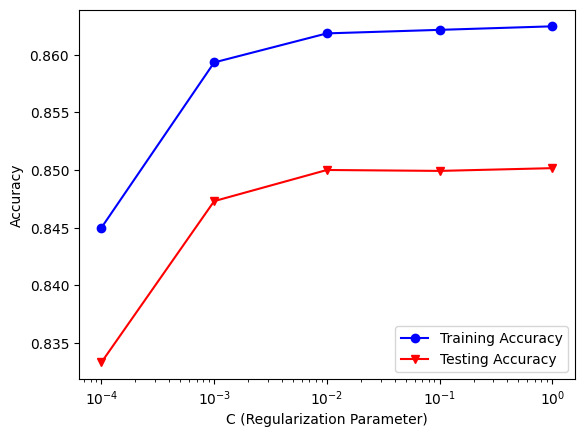

In [4]:
plt.plot(C, training_accuracy, color = 'blue', marker = 'o')
plt.plot(C, testing_accuracy, color = 'red', marker = 'v')
plt.xscale('log')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('C (Regularization Parameter)')
plt.show()

#### Creating and Saving Optimal Model for Dataset 1 Linear SVM

The optimal parameters for the Linear SVM model for Dataset 1 are used and saved as a pickle file known as `svm_linear_70_30_dataset_1.pkl`.

In [5]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'linear', C = 0.01, random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_linear_70_30_dataset_1.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 1)

In [6]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8618367346938776
Precision: 0.866092945627539
Recall: 0.8615364383868375
F1 Score: 0.8613600091937218
Mean Squared Error (MSE): 0.5526530612244898
Matthews Correlation Coefficient (MCC): 0.727615117162162
Cohen's Kappa: 0.7235011851245773
Hamming Loss: 0.13816326530612244

Confusion Matrix:
 [[13531  1251]
 [ 2811 11807]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.83      0.92      0.87     14782
         1.0       0.90      0.81      0.85     14618

    accuracy                           0.86     29400
   macro avg       0.87      0.86      0.86     29400
weighted avg       0.87      0.86      0.86     29400





#### Classifier Metrics for Testing Dataset (Dataset 1)

In [7]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.85
Precision: 0.8560250541702944
Recall: 0.8508486547330417
F1 Score: 0.8495592491572501
Mean Squared Error (MSE): 0.6
Matthews Correlation Coefficient (MCC): 0.7068547553971921
Cohen's Kappa: 0.7004727835992208
Hamming Loss: 0.15

Confusion Matrix:
 [[5696  522]
 [1368 5014]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.81      0.92      0.86      6218
         1.0       0.91      0.79      0.84      6382

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





#### Confusion Matrix for Training Dataset (Dataset 1)

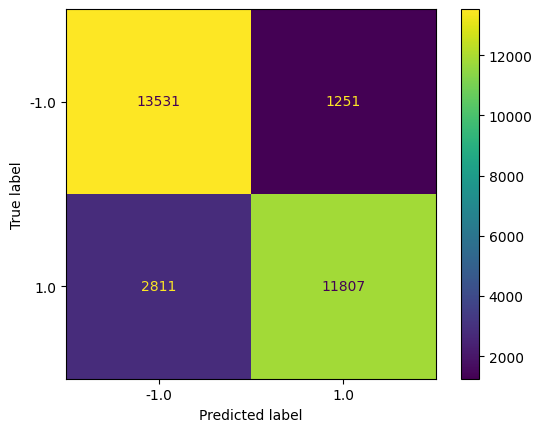

In [8]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 1)

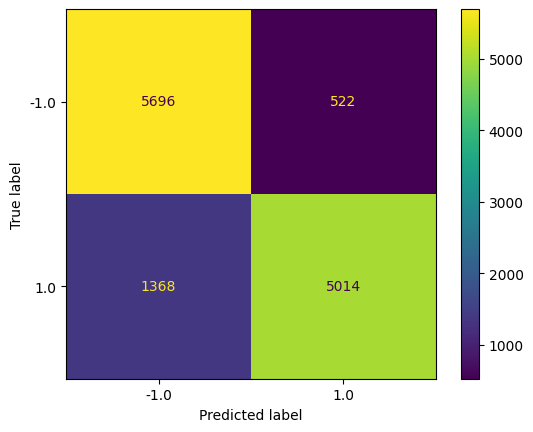

In [9]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Dataset_2 (noncir_ss_scaled_trimmed_cir_ss_scaled)

Evaluation of the performance of `dataset_2`. With a 70:30 training and test split

In [10]:
# Select the features to be used for Support Vector Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM, we will iterate through various values of the regularization parameter `C`

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.

In [11]:
C = [0.0001, 0.001, 0.01, 0.1]

training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'linear', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

C Value:  0.0001
Training Accuracy:  0.8565986394557823
Testing Accuracy:  0.8434126984126984
C Value:  0.001
Training Accuracy:  0.8719727891156462
Testing Accuracy:  0.8513492063492063
C Value:  0.01
Training Accuracy:  0.8784693877551021
Testing Accuracy:  0.8526190476190476
C Value:  0.1
Training Accuracy:  0.8800680272108844
Testing Accuracy:  0.8542857142857143


#### Training vs Testing Accuracy Graph

Based on the C (Regularization Parameter), the most optimal value of C is at 0.001 where the training and testing accuracy hovers around a similar accuracy range as the value of C increases.

By selecting an optimal value of C, we are able to prevent overfitting from a high value of C and underfitting from a low value of C.

As shown in the graph below, the traning accuracy gradually increases by a small margin whenever our regularization parameter increases however, our testing accuracy still remains within the range of 85% despite the training accuracy increasing, which suggests that the model may be overfitting as the value of C increases after the point where `C = 0.001`.

The optimal parameter for linear SVM with Dataset 2 is:
- `C`: `0.001`

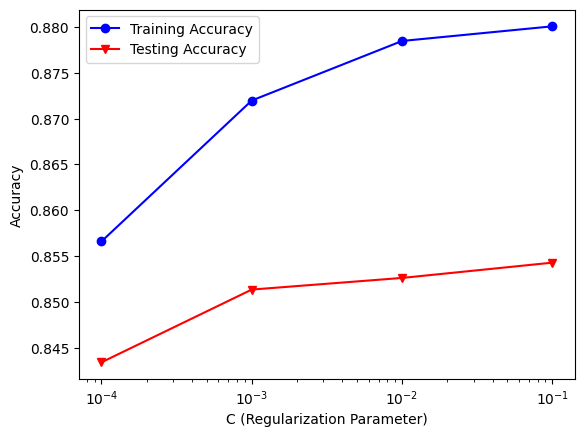

In [13]:
plt.plot(C, training_accuracy, color = 'blue', marker = 'o')
plt.plot(C, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.show()

#### Creating and Saving Optimal Model for Dataset 2 Linear SVM

The optimal parameters for the Linear SVM model for Dataset 1 are used and saved as a pickle file known as `svm_linear_70_30_dataset_2.pkl`.

In [16]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'linear', C = 0.001, random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_linear_70_30_dataset_2.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 2)

In [17]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8719727891156462
Precision: 0.876503911418588
Recall: 0.8716678749354022
F1 Score: 0.8715175650689803
Mean Squared Error (MSE): 0.5121088435374149
Matthews Correlation Coefficient (MCC): 0.748156156592495
Cohen's Kappa: 0.7437834037615478
Hamming Loss: 0.12802721088435373

Confusion Matrix:
 [[13693  1089]
 [ 2675 11943]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      0.93      0.88     14782
         1.0       0.92      0.82      0.86     14618

    accuracy                           0.87     29400
   macro avg       0.88      0.87      0.87     29400
weighted avg       0.88      0.87      0.87     29400





#### Classifier Metrics for Testing Dataset (Dataset 2)

In [18]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8513492063492063
Precision: 0.8571713909676044
Recall: 0.8521825919815693
F1 Score: 0.8509314755178361
Mean Squared Error (MSE): 0.5946031746031746
Matthews Correlation Coefficient (MCC): 0.7093364399285669
Cohen's Kappa: 0.7031577590515137
Hamming Loss: 0.14865079365079364

Confusion Matrix:
 [[5697  521]
 [1352 5030]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.81      0.92      0.86      6218
         1.0       0.91      0.79      0.84      6382

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





#### Confusion Matrix for Training Dataset (Dataset 2)

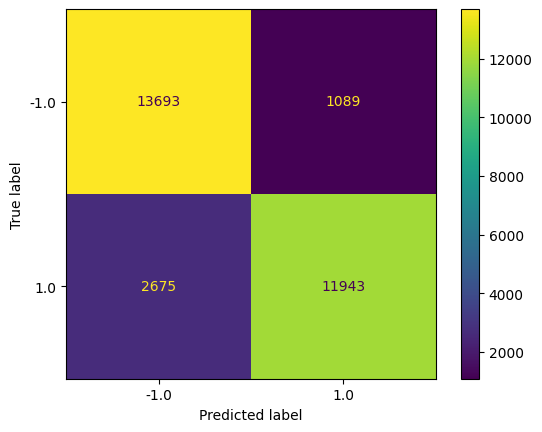

In [19]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 2)

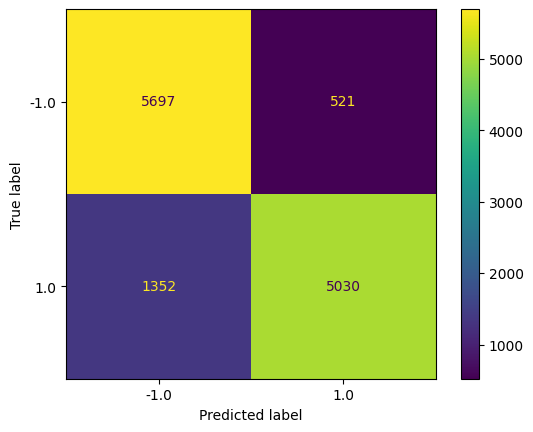

In [20]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Dataset_3 (noncir_ss_scaled_trimmed_cir_pca)

Evaluation of the performance of `dataset_3`. With a 70:30 training and test split

In [4]:
# Select the features to be used for Support Vector Classification
X = dataset_3.drop(columns = 'NLOS')
Y = dataset_3[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM, we will iterate through various values of the regularization parameter `C`.

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.

`Unable to test due to a long training time > 1200 minutes for 1 parameter`

In [5]:
C = [0.01, 0.1, 1, 10]

training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'linear', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

## Non-Linear SVM (Radial Basis Function)

The kernel function that will be used for SVM is the Radial Basis function to create a hyperplane that is able to divide non-linear data by using the kernel function to transform it into a higher dimension.

### Dataset_1 (noncir_ss_scaled_trimmed_cir_pca_ss_scaled)

Evaluation of the performance of `dataset_1`. With a 70:30 training and test split

In [5]:
# Select the features to be used for Support Vector Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM, we will conduct Hyperparameter tuning through iterating through various values of the regularization parameter `C`.

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.
- `gamma`
    - Kernel coefficient for non-linear classifiers
    - Defines how far the influence of a single training example reaches, a higher gamma value will result in a more complex decision boundary, which may lead to overfitting.

In [22]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'rbf', gamma = 'auto', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

C Value:  0.0001
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  0.001
Training Accuracy:  0.7815646258503401
Testing Accuracy:  0.7656349206349207
C Value:  0.01
Training Accuracy:  0.8467687074829932
Testing Accuracy:  0.8306349206349206
C Value:  0.1
Training Accuracy:  0.8855102040816326
Testing Accuracy:  0.8652380952380953
C Value:  1
Training Accuracy:  0.9294897959183673
Testing Accuracy:  0.8892857142857142
C Value:  10
Training Accuracy:  0.9726530612244898
Testing Accuracy:  0.8961111111111111
C Value:  100
Training Accuracy:  0.9985034013605442
Testing Accuracy:  0.8724603174603175


#### Training vs Testing Accuracy Graph

Based on the C (Regularization Parameter), the most optimal value of C is at 0.1 where the training and testing accuracy hovers around a similar accuracy range as the value of C increases.

By selecting an optimal value of C, we are able to prevent overfitting from a high value of C and underfitting from a low value of C.

As shown in the graph below, the traning accuracy gradually increases by a small margin whenever our regularization parameter increases apart from that knee point from `C = 0.0001` to `C = 0.001`, however after that knee point, our testing accuracy still remains within the range of 88% despite the training accuracy increasing, which suggests that the model may be overfitting as the value of C increases after the point where `C = 0.1`. Additionally, after the point where `C = 1`, it can be seen that the testing accuracy showed a sudden drop despite the training accuracy reaching close to 100%. Which suggests that the model is overfitted at that point.

The optimal parameter for linear SVM with Dataset 1 is:
- `C`: `0.1`

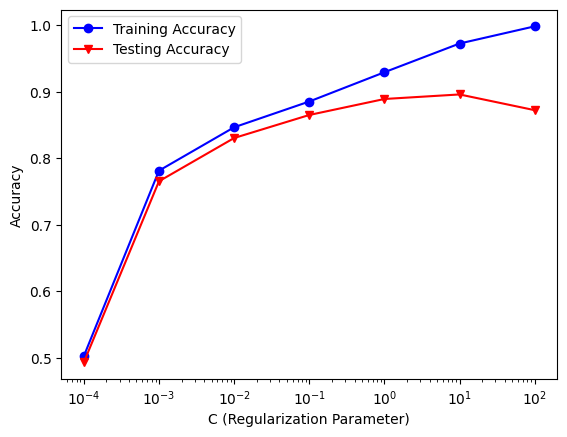

In [24]:
plt.plot(C, training_accuracy, color = 'blue', marker = 'o')
plt.plot(C, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.show()

#### Creating and Saving Optimal Model for Dataset 1 Non-Linear SVM

The optimal parameters for the Linear SVM model for Dataset 1 are used and saved as a pickle file known as `svm_non_linear_70_30_dataset_1.pkl`.

In [25]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'rbf', C = 0.1, gamma = 'auto', random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_non_linear_70_30_dataset_1.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 1)

In [26]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8855102040816326
Precision: 0.8911090450103215
Recall: 0.8851783883543121
F1 Score: 0.8850330724451221
Mean Squared Error (MSE): 0.4579591836734694
Matthews Correlation Coefficient (MCC): 0.7762647786106741
Cohen's Kappa: 0.7708628529137735
Hamming Loss: 0.11448979591836735

Confusion Matrix:
 [[13964   818]
 [ 2548 12070]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.85      0.94      0.89     14782
         1.0       0.94      0.83      0.88     14618

    accuracy                           0.89     29400
   macro avg       0.89      0.89      0.89     29400
weighted avg       0.89      0.89      0.89     29400





#### Classifier Metrics for Testing Dataset (Dataset 1)

In [27]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8652380952380953
Precision: 0.8719343161216357
Recall: 0.8661182610024434
F1 Score: 0.8648088317718329
Mean Squared Error (MSE): 0.539047619047619
Matthews Correlation Coefficient (MCC): 0.7380296607199098
Cohen's Kappa: 0.7309164867645142
Hamming Loss: 0.13476190476190475

Confusion Matrix:
 [[5806  412]
 [1286 5096]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.93      0.87      6218
         1.0       0.93      0.80      0.86      6382

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.86     12600
weighted avg       0.87      0.87      0.86     12600





#### Confusion Matrix for Training Dataset (Dataset 1)

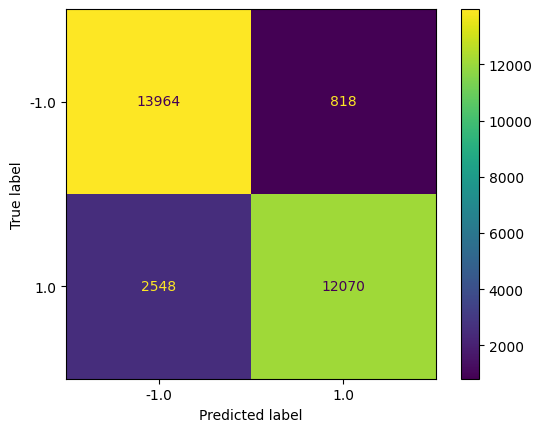

In [28]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 1)

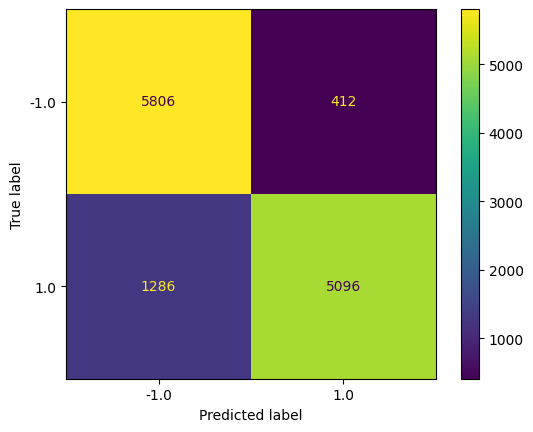

In [29]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Dataset_2 (noncir_ss_scaled_trimmed_cir_ss_scaled)

Evaluation of the performance of `dataset_2`. With a 70:30 training and test split

In [30]:
# Select the features to be used for Support Vector Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM, we will conduct Hyperparameter tuning through iterating through various values of the regularization parameter `C`.

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.
- `gamma`
    - Kernel coefficient for non-linear classifiers
    - Defines how far the influence of a single training example reaches, a higher gamma value will result in a more complex decision boundary, which may lead to overfitting.

In [31]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'rbf', gamma = 'auto', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

C Value:  0.0001
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  0.001
Training Accuracy:  0.7490816326530613
Testing Accuracy:  0.7420634920634921
C Value:  0.01
Training Accuracy:  0.7787755102040816
Testing Accuracy:  0.7692857142857142
C Value:  0.1
Training Accuracy:  0.8626530612244898
Testing Accuracy:  0.8464285714285714
C Value:  1
Training Accuracy:  0.9218367346938775
Testing Accuracy:  0.8688888888888889
C Value:  10
Training Accuracy:  1.0
Testing Accuracy:  0.8825396825396825
C Value:  100
Training Accuracy:  1.0
Testing Accuracy:  0.881984126984127


#### Training vs Testing Accuracy Graph

Based on the C (Regularization Parameter), the most optimal value of C is at 0.1 where the training and testing accuracy hovers around a similar accuracy range as the value of C increases.

By selecting an optimal value of C, we are able to prevent overfitting from a high value of C and underfitting from a low value of C.

As shown in the graph below, even though the training accuracy continues to make a drastic increase each time our regularization parameter increases, the testing accuracy gradually remains around the range of 85%. This suggests that the model may be overfitting as the value of C increases after the point where `C = 0.1`. 

The optimal parameter for linear SVM with Dataset 2 is:
- `C`: `0.1`

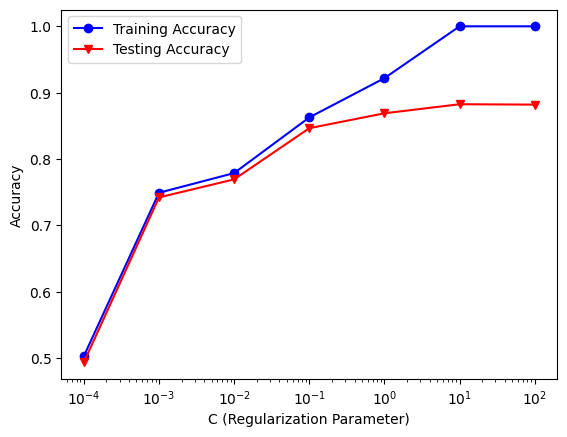

In [32]:
plt.plot(C, training_accuracy, color = 'blue', marker = 'o')
plt.plot(C, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.show()

#### Creating and Saving Optimal Model for Dataset 2 Non-Linear SVM

The optimal parameters for the Linear SVM model for Dataset 1 are used and saved as a pickle file known as `svm_non_linear_70_30_dataset_2.pkl`.

In [33]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'rbf', C = 0.1, gamma = 'auto', random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_non_linear_70_30_dataset_2.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 2)

In [34]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8626530612244898
Precision: 0.86988758313493
Recall: 0.8622636117382818
F1 Score: 0.8618838901865217
Mean Squared Error (MSE): 0.5493877551020409
Matthews Correlation Coefficient (MCC): 0.732111499168272
Cohen's Kappa: 0.7250857941513922
Hamming Loss: 0.1373469387755102

Confusion Matrix:
 [[13778  1004]
 [ 3034 11584]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.93      0.87     14782
         1.0       0.92      0.79      0.85     14618

    accuracy                           0.86     29400
   macro avg       0.87      0.86      0.86     29400
weighted avg       0.87      0.86      0.86     29400





#### Classifier Metrics for Testing Dataset (Dataset 2)

In [35]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8464285714285714
Precision: 0.8550020030603477
Recall: 0.8474408967646723
F1 Score: 0.845741344063812
Mean Squared Error (MSE): 0.6142857142857143
Matthews Correlation Coefficient (MCC): 0.7024022047133456
Cohen's Kappa: 0.6934417276241631
Hamming Loss: 0.15357142857142858

Confusion Matrix:
 [[5753  465]
 [1470 4912]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.80      0.93      0.86      6218
         1.0       0.91      0.77      0.84      6382

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





#### Confusion Matrix for Training Dataset (Dataset 2)

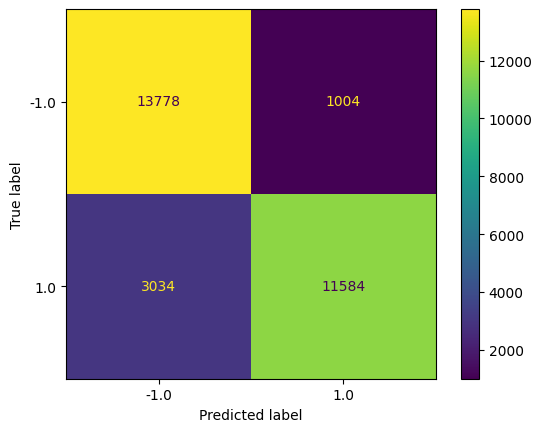

In [36]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 2)

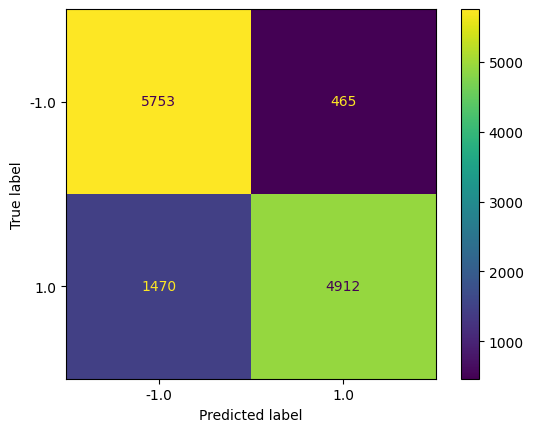

In [37]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Dataset_3 (noncir_ss_scaled_trimmed_cir_pca)

Evaluation of the performance of `dataset_3`. With a 70:30 training and test split

In [38]:
# Select the features to be used for Support Vector Classification
X = dataset_3.drop(columns = 'NLOS')
Y = dataset_3[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

To determine the most optimal parameters for SVM, we will conduct Hyperparameter tuning through iterating through various values of the regularization parameter `C`.

The following are the parameters that we will be tuning:
- `C`
    - Regularization parameter that controls the trade-off between a low training error and minimizing the norm of the weights.
    - A higher value of C allows more flexibility in the decision boundary, potentially leading to overfiting, while a lower value of C imposes a smoother decision boundary and may lead to underfitting.
- `gamma`
    - Kernel coefficient for non-linear classifiers
    - Defines how far the influence of a single training example reaches, a higher gamma value will result in a more complex decision boundary, which may lead to overfitting.

In [39]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


training_accuracy = []
testing_accuracy = []

for c in C:
    clf = SVC(C = c, kernel = 'rbf', gamma = 'auto', random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("C Value: ", c)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

C Value:  0.0001
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  0.001
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  0.01
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  0.1
Training Accuracy:  0.5027891156462585
Testing Accuracy:  0.4934920634920635
C Value:  1
Training Accuracy:  1.0
Testing Accuracy:  0.4934920634920635
C Value:  10
Training Accuracy:  1.0
Testing Accuracy:  0.4934920634920635
C Value:  100
Training Accuracy:  1.0
Testing Accuracy:  0.4934920634920635


#### Training vs Testing Accuracy Graph

Based on the C (Regularization Parameter), the most optimal value of C is at 0.0001.

By selecting an optimal value of C, we are able to prevent overfitting from a high value of C and underfitting from a low value of C.

As shown in the graph below, the training accuracy suddenly spiked to 100% when the value of `C = 1` which suggests that the model is severaly overfitted. As seen from the point where `C = 0.0001` to `C = 0.1`, the training and testing accuracy remained the same. As such the optimal value of C that we have selected is `C = 0.0001`.

The optimal parameter for linear SVM with Dataset 1 is:
- `C`: `0.0001`

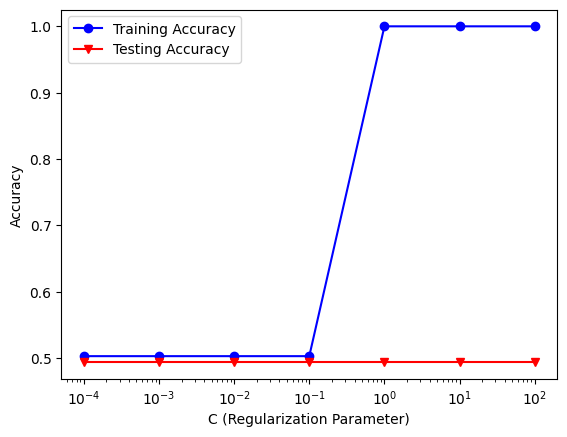

In [40]:
plt.plot(C, training_accuracy, color = 'blue', marker = 'o')
plt.plot(C, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.show()

#### Creating and Saving Optimal Model for Dataset 3 Non-Linear SVM

The optimal parameters for the Linear SVM model for Dataset 1 are used and saved as a pickle file known as `svm_non_linear_70_30_dataset_3.pkl`.

In [41]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'rbf', C = 0.0001, gamma = 'auto', random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_non_linear_70_30_dataset_3.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 3)

In [42]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.5027891156462585
Precision: 0.25139455782312925
Recall: 0.5
F1 Score: 0.3345706396269974
Mean Squared Error (MSE): 1.988843537414966
Matthews Correlation Coefficient (MCC): 0.0
Cohen's Kappa: 0.0
Hamming Loss: 0.4972108843537415

Confusion Matrix:
 [[14782     0]
 [14618     0]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.50      1.00      0.67     14782
         1.0       0.00      0.00      0.00     14618

    accuracy                           0.50     29400
   macro avg       0.25      0.50      0.33     29400
weighted avg       0.25      0.50      0.34     29400





c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Classifier Metrics for Testinng Dataset (Dataset 3)

In [43]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.4934920634920635
Precision: 0.24674603174603174
Recall: 0.5
F1 Score: 0.33042831331703687
Mean Squared Error (MSE): 2.026031746031746
Matthews Correlation Coefficient (MCC): 0.0
Cohen's Kappa: 0.0
Hamming Loss: 0.5065079365079365

Confusion Matrix:
 [[6218    0]
 [6382    0]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.49      1.00      0.66      6218
         1.0       0.00      0.00      0.00      6382

    accuracy                           0.49     12600
   macro avg       0.25      0.50      0.33     12600
weighted avg       0.24      0.49      0.33     12600





c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\DA-Project\CSC3105-DA-T2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Confusion Matrix for Training Dataset (Dataset 3)

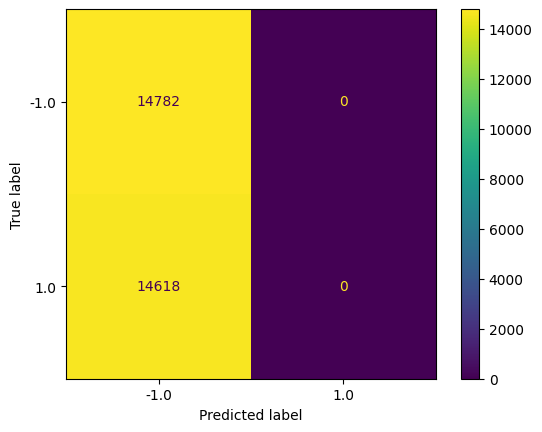

In [44]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 3)

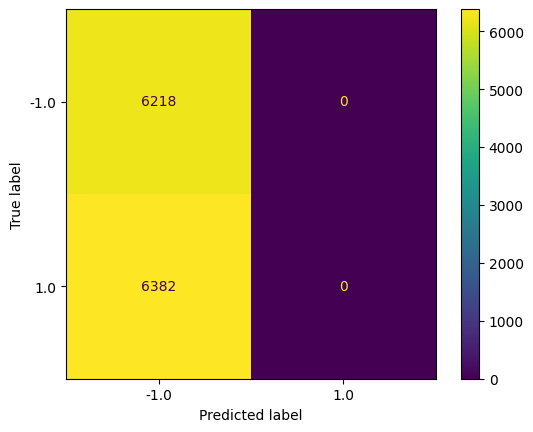

In [45]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()